## Feature Engineering
Welcome to the first lesson in Optimizing Machine Learning Models in Python. Machine learning is the process of training mathematical models on data and using these models to make predictions on new, unseen data.
According to the State of Data Science 2020 from Anaconda, feature engineering is a crucial step in the machine learning workflow, representing about a quarter of programing time. Feature engineering is the process of taking features or predictors in the data and transforming them into a format that improves predictions. Feature engineering is also known as feature extraction. A feature or predictor is a numeric representation of our raw data.

In this course, we'll learn how, why, and when to apply feature engineering by learning the reasoning and mathematics behind it. Feature engineering is a big topic, so we will limit the scope of this lesson to numerical data. To help you learn, we have provided additional resources in the Takeaways at the end of this lesson.

Features can be continuous or categorical, but feature engineering requires us to look at other aspects of these data. This includes the following:

- **Sign: 
refers to a feature's positivity or negativity. This can be important when we use aggregated values or count values, like daily visits to a website or to a restaurant.
- **Scale: 
refers to a feature's size might be. We might need to check if different features span different orders of magnitude since this might affect prediction accuracy.
- **Distribution: 
refers to how common specific values of a feature are relative to others. We may find that a feature takes values in some typical range, and that there might be outliers that are far away from this typical set.


In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
col_missing=['total_bedrooms']

## Univariate Imputation
 Traning a model on only observations where all the data is present is called a complete case analysis. **Complete case analysis** isn't necessarily a bad thing, but it can result in bias and reduced efficiency in the model if we have to remove large portions of the data.
The first type of imputation that we'll discuss is **univariate imputation**. As the name suggests, univariate imputation only uses information from a single column to perform the imputation, and this column is usually the one with the missing values. In univariate imputation, we can choose to fill in missing values based on some statistic such as the mean, median, or mode. These statistics represent the average or most frequent value of a feature, so these are not bad predictions to make.

The scikit-learn library provides objects for us to implement imputation using the impute module. Specifically, we'll use the SimpleImputer class. In order to instantiate a SimpleImputer() object, we need to specify two arguments:

missing_values: what values indicate missing values?
strategy: how should we fill in these missing values?

`from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")`

Above, we initialize a SimpleImputer() object and specify that NaN values represent missing values. To fill in these missing values, we use the mean. These arguments can take other values, so you can read further into the documentation for the SimpleImputer class to learn more.

After we instantiate a SimpleImputer() object, we can use it to perform imputation on any dataset we feed it. To do so, we need to use the fit_transform() method in the class. This method takes in a dataset with missing values and outputs the same dataset with imputed values.



In [6]:
df= df.drop(columns=['ocean_proximity'], axis=1)
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(missing_values= np.nan, strategy='median')

data= imputer.fit_transform(df)

In [7]:
housing= pd.DataFrame(data, columns=df.columns)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## K-Nearest Neighbors Imputation
This is the idea behind K-Nearest Neighbors imputation. If we are trying to impute a feature for an observation, we should look at other observations that are similar or "close" to it (i.e., its neighbors). If these neighbors have values for the feature of interest, we can make a more educated prediction of what the missing value should be. Specifically, we take the average of the neighbor's features and use this to impute for the one with the missing value. (The main concepts behind K-nearest neighbors has been explored elsewhere, so we won't delve into it here.



In [8]:
from sklearn.impute import KNNImputer

imputer= KNNImputer(missing_values= np.nan, n_neighbors=3)
data2= imputer.fit_transform(df)

housing2= pd.DataFrame(data2, columns=df.columns)
housing2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Outlier Detection
The next aspect of feature engineering that we'll discuss is handling outliers. Outliers are observations that stand out from the concentration of other observations. As such, outliers can be extremely small or extremely large. Outliers can be troublesome because they can influence the estimation of model parameters, which harms model predictions. Therefore, we might consider removing outliers from our data — or at least being aware of their presence.

In either case, we have to first identify outliers in our data. This is the process of outlier detection. Since outliers represent either extremely low or high values, one way we can detect them is by generating box plots, also known as box and whisker plots. Box plots tell us about the distribution of a feature in terms of its quartiles. The quartiles represent the 25th, 50th, and 75th percentiles of the feature. We show an example of a box plot below:

<img src=boxplot.png width=500 height=500>

The numbers denote the following:

This line is a lower bound, which we'll discuss below.
The lower end of the box is the 25th quantile of median_house_value, also known as 
Q
1
.
The middle of the box is the 50th quantile, also known as the median or 
Q
2
.
The upper end of the box is the 75th quantile, also known as 
Q
3
.
This line is an upper bound, which we'll also discuss below.
These dots represent observations that go past the upper bound, which we classify as outliers.
The top and bottom of the "box" in the box plot are formed by 
Q
3
 and 
Q
1
. The upper and lower bounds are calculated as a function of these two values. First, we must understand the interquartile range (
IQR
). The 
IQR
 is calculated as 
Q
3
 - 
Q
1
, and we may think of it as the range of values that contain the central 50% of the observations.

In order to calculate the lower bound in the box plot, we subtract 
\1.5 × IQR from Q1. Similarly, to calculate the upper bound, we add 1.5 × IQR to Q3

. Any values that are outside of these bounds are considered outliers. Therefore, we can use the quartiles to help detect outliers. Keen readers might ask, "Why is 1.5 used in that calculation?" We'll discuss this more on the next screen, but know that it's not an arbitrary number. There is a mathematical reason behind it!

As a note, the above plot was created using the boxplot() method. This function flags outliers using the rule we described, but it draws the lower and upper bounds in terms of data points that are close to the upper and lower bound calculations. This might explain any discrepancies you may see in the plot versus hand calculation.



In [9]:
percentiles= [ 25, 50, 75]

data_quartiles= np.percentile(housing, percentiles)
data_quartiles

array([  18.,  275., 1359.])

In [10]:
q1= housing.quantile(.25, axis=0)
q2= housing.quantile(.50, axis=0)
q3= housing.quantile(.75, axis=0)

In [11]:
print(q1,q2,q3)

longitude               -121.8000
latitude                  33.9300
housing_median_age        18.0000
total_rooms             1447.7500
total_bedrooms           297.0000
population               787.0000
households               280.0000
median_income              2.5634
median_house_value    119600.0000
Name: 0.25, dtype: float64 longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
Name: 0.5, dtype: float64 longitude               -118.01000
latitude                  37.71000
housing_median_age        37.00000
total_rooms             3148.00000
total_bedrooms           643.25000
population              1725.00000
households               605.00000
median_income              4.74325
median_house_value    264725.00000
Name: 0.75, dtype: f

In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [13]:
mhv_q1= housing['median_house_value'].quantile(.25)
mhv_q3= housing['median_house_value'].quantile(.75)
mhv_iqr= mhv_q3-mhv_q1
print(mhv_q1, mhv_q3, mhv_iqr)

119600.0 264725.0 145125.0


In [14]:
lower_bound_mhv= mhv_q1 - (1.5*mhv_iqr)
upper_bound_mhv= mhv_q3 + (1.5*mhv_iqr)
print(lower_bound_mhv, upper_bound_mhv)

-98087.5 482412.5


In [15]:
a= housing['median_house_value']
mhv_num_outliers=a[(a < (lower_bound_mhv))|( a > (upper_bound_mhv))]

In [16]:
len(mhv_num_outliers)

1071

In [17]:
housing.shape

(20640, 9)

##  Z-Scores
On this screen, we'll learn another method for detecting outliers based on the normal distribution. A normal, or Gaussian, distribution is a probability distribution with a characteristic "bell-shaped" curve. The peak of the bell is centered on the mean of the normal distribution, and the spread of the data around the mean is dictated by its variance.

<img src=normal.png width=500 height=500>

A normal distribution has several qualities that make it useful for characterizing data. One of these qualities is that normally distributed data are highly concentrated around its mean. Concentration around the mean results in the 68-95-99 rule, which states the following:

- 68% of normally distributed data falls within 1 standard deviation (i.e., the square root of variance).
- 95% of normally distributed data falls within 2 standard deviations.
- 99% of normally distributed data falls within 3 standard deviations.

That is, virtually all the data will fall within three standard deviations of the mean. Note that we must make the assumption that the data is normally distributed for this rule to hold. Verifying this assumption is outside of the scope of this lesson, but it is something we should make explicit when we check for outliers.

Knowing that 99% of normally distributed data is within three standard deviations of the mean, we can use this fact to detect outliers. By calculating how many standard deviations each observation is away from the mean, we can use this as our detection method. In other words, we're using the mean and standard deviation of a normal distribution, instead of the quartiles used in the box plot method.

To calculate the number of standard deviations that an observation is away from the mean, we can calculate something called the **Z-score**. We calculate the Z-score as follows:

Assuming we have an array of observations from some feature 
X
, we can calculate its mean 
μ
 and its standard deviation 
σ
. Then, for each observation in 
X
, we subtract the mean and divide by the standard deviation to get the Z-score. This value actually represents how many standard deviations the original observation is away from the mean. Doing these two operations is also known as centering and scaling.

Z-scores can also have a sign as well, which indicates where the observation is relative to the mean. For example, if an observation had a Z-score of 1, it indicates that the observation is 1 standard deviation above the mean. A Z-score of -2.5 indicates the observation is 2.5 standard deviations below the mean.

Using the 68-95-99 rule, any observation that has a Z-score outside of the range -3 to 3 will be marked as an outlier. In fact, the reason a 1.5 factor is used in the box plot method for detecting outliers references this idea. It turns out that 1.5 is approximately the factor needed to cover 99% of the data based on the quartiles instead of the mean and standard deviation. So, both outlier detection methods use this idea that the outliers will stray extremely far from the middle of the data.



In [18]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [19]:
mean_mhv= housing['median_house_value'].mean()
std_mhv= housing['median_house_value'].std()

z_scores= (housing['median_house_value'] - mean_mhv)/std_mhv
z_scores

0        2.129580
1        1.314124
2        1.258663
3        1.165072
4        1.172871
           ...   
20635   -1.115777
20636   -1.124443
20637   -0.992722
20638   -1.058583
20639   -1.017853
Name: median_house_value, Length: 20640, dtype: float64

In [20]:
result= sum((z_scores < -3) | (z_scores > 3))
result

0

We've learned how to detect outliers using imputation, but we haven't really examined what we should do about them. Handling outliers can be difficult because we have to carefully examine the data and make a judgment: does this outlier stem from a data collection error or from the underlying nature of the data?

The former case is easier to handle. If the outlier represents some kind of random mistake from data collection, then we can treat it like a missing data problem. The data is observed, but it's incorrect, so we can try to remove this observation or use the imputation methods we learned earlier. Sometimes it's easy to spot this type of outlier. If all of the values of a column range from 0 to 10 except for an outlier that has a value of 10000, then we should either remove it or impute it.

The more difficult case is when we believe that the outlier may have happened naturally for that feature; extreme values are normal in some cases. For example, stock prices may vary, historically, within a small range for most of its existence. Then, rare events like a recession may suddenly spike or flatten the price. In this case, some force is causing the extreme value, not some random measurement error. If we were to ignore these extreme stock prices in a machine learning model, we run the risk of heavily biasing the model because we are essentially ignoring an important phenomenon that caused the change.

Because of this, we must resolve outliers on a case-by-case basis. Every dataset is created under different circumstances, so the best thing we can do is examine the data and make a judgment. Here are a few heuristics to follow:

- As mentioned above, if the outlier seems to be the result of a random mistake, then exclude it or use imputation to make a better guess as to the outlier value.

- In the presence of outliers, repeat the analysis under different circumstances: try including them, and then try excluding them. There may be a lucky case where the outlier does not really affect the model predictions. Otherwise, it's important to document this finding.

- Be transparent. Use either a box plot or the z-score to identify outliers and make it clear in your report how many there are and which columns contain them. If your model predictions seem off, then they might be a potential cause. In either case, documenting whether or not you include them can help your teammates decide how to proceed.

You may have noticed that the box plot and Z-score methods we used to identify outliers on the previous two screens had starkly different results. The box plot method found 1071 outliers, while the Z-score method found none! One of the reasons behind this discrepancy is an implicit assumption we need to make when using Z-scores: we assume the data is normally distributed. Let's check this assumption by looking at the histogram for median_house_value:



<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

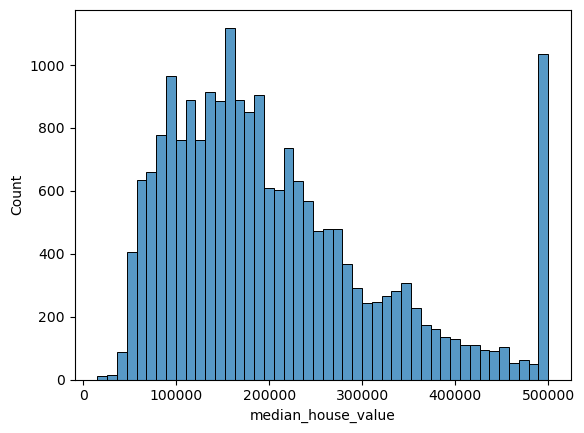

In [21]:
import seaborn as sns
sns.histplot(data= housing, x='median_house_value')

We can see from the histogram that median_house_value is actually skewed to the right, meaning that there are more extremely high values than would be expected in a normal distirbution. If the normality assumption is violated, then Z-scores aren't as useful as an outlier detection tool and can even yield false conclusions. As a general rule, we suggest using the box plot method to evaluate if there are outliers in your dataset. Since the important points of a box plot are decided by the quartiles, they will be less influenced by extreme values unlike the mean and standard deviation.

## Imbalanced Datasets
To conclude this lesson, we'll learn about one last aspect of feature engineering that might prove useful as we see more datasets. While outliers and missing data are more general problems, this particular feature engineering aspect deals specifically with classification. In classification tasks, we know that we have both cases (coded as 1 or True) and non-cases (coded as 0 or False). When there's an approximately equal number of cases and non-cases, the model can more easily be optimized to distinguish between them.

However, sometimes we aren't so lucky, and we might encounter a dataset where either the cases or non-cases form a majority of the dataset. This can happen in contexts when cases are uncommon, such as with rare diseases or events. When this happens, we refer to the dataset as being imbalanced.

When this happens, we refer to the dataset as being imbalanced.

Imbalanced datasets can hurt predictive ability because the minority class has less data, making it harder to determine how to use the predictors to distinguish them. An imbalanced dataset can also be problematic because it affects how we typically interpret standard performance metrics like accuracy. For example, if a dataset contained 90% non-cases and only 10% cases, a naive classifier might predict that every observation in the dataset is a non-case. The accuracy of this naive classifier would already be 90%, even if we don't use any information in our prediction.

Imbalance can vary in terms of severity as well. A good heuristic for diagnosing this imbalance is to check the percentage of the minority class, the class with a smaller amount of observations in the data:

- 20–40% of the data is in the minority class = mild imbalance
- 1–20% of the data is in the minority class = moderate imbalance
- < 1% of the data is in the minority class = extreme imbalance

To alleviate imbalance, we'll learn two related feature engineering techniques. The first is **downsampling**. Downsampling is the process of reducing the number of majority class observations so that the proportion of the data we use is closer to the proportion of the minority class. To downsample a dataset, we need to choose what proportion of the data we want to be the majority class. Then, we remove enough observations to achieve this.

The second technique is called **upweighting**. Whereas downsampling involves manipulating the majority class, upweighting manipulates the minority class. As its name suggests, upweighting involves giving more "weight" to the minority class. To understand weights, we can think of every observation in a dataset as having a single "vote" of influence. When we train models, each of these observations are treated equally and are used only once. Now, when we upweigh an observation, say one from the minority class, we are giving it more "votes" of influence. Instead of being used only once, an upweighted observation will be used multiple times. As a result, the upweighted minority class will have "more" observations present in the data, without needing to collect more data.


In [22]:
house= pd.read_csv('house.csv')
house.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [23]:
house['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [24]:
house.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [25]:
house.shape

(20640, 10)

In [26]:
house['near_ocean']= np.where(house['ocean_proximity']== 'NEAR OCEAN', 1, 0)

In [27]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [28]:
house['near_ocean'].value_counts()

0    17982
1     2658
Name: near_ocean, dtype: int64

In [29]:
0.6 * 2658

1594.8

In [30]:
n_min= 2658
n_maj= int(np.ceil((0.6/0.4) *n_min))
n_maj

3987

In [31]:
minority_housing= house[house['near_ocean']==1]
majority_housing= house[house['near_ocean']==0]

In [32]:
maj_ds= majority_housing.sample(n_maj, random_state=1)
len(maj_ds)

3987

In [33]:
balanced_housing= pd.concat([maj_ds, minority_housing])

In [34]:
balanced_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_ocean
5466,-118.47,33.99,50.0,1568.0,501.0,764.0,478.0,3.0150,414300.0,<1H OCEAN,0
11296,-117.92,33.79,26.0,2737.0,614.0,1877.0,606.0,2.8622,184300.0,<1H OCEAN,0
18996,-121.92,38.37,26.0,2056.0,413.0,933.0,367.0,2.7051,193800.0,INLAND,0
1644,-121.94,37.83,11.0,2836.0,373.0,959.0,335.0,10.5815,500001.0,INLAND,0
4921,-118.25,34.00,32.0,1218.0,342.0,1292.0,304.0,1.5781,102900.0,<1H OCEAN,0


In [35]:
balanced_housing['near_ocean'].value_counts()

0    3987
1    2658
Name: near_ocean, dtype: int64

## Model Selection/ Feature Selection Techniques
Welcome to the second lesson in Optimizing Machine Learning Models in Python. In the previous lesson, we learned about different aspects of feature engineering and how to handle different data issues, such as missing data and outliers. Often, we won't know beforehand which features to use or engineer for our models, especially when there are many features to choose from. It would be nice if we could determine which features to use before we invest any time in feature engineering. Instead of having just one model, we'll often need to craft multiple models with different combinations of features to try to maximize predictive ability.

### Sequential Feature Selection
When we explore the data, we often use visualizations to see how individual features relate to the outcome of interest. With these visualizations, we can pick out features that seem to be strongly correlated with the outcome or help distinguish between cases and non-cases. A weakness of this approach is that it's difficult to consider how these relationships change as we add features to a model. For example, we might notice that two features each show a strong correlation with the outcome of interest.

<img src=sf.png width= 400 height=400>

Intuitively, we might want to include both features, 
X1 and X2, in a regression model. What this approach fails to consider is that X1 and X2 might be correlated with each other. If this is the case, having X1 in a model alone will produce similar results to having X2 in a model, but including them both won't add extra benefit. We might mistakenly believe X2 is a useful feature and attempt to use it in future models, making them more complex than they need to be.

This weakness highlights a need for an approach that selects groups of features for a model. This process is called **sequential feature selection, also known as subset selection.** scikit-learn provides some functionality for implementing subset selection.

There are two main methods of sequential feature selection that we'll learn: **forward selection and backward selection**. Both methods produce a model with a subset of features that perform well based on some metric, such as MSE, but they differ in their approach to how the features are chosen.

We'll start with the forward selection algorithm. In forward selection, we start with an intercept-only model (a regression model without predictors). Then, the algorithm iterates over each feature in the dataset to see which one would produce the best model if it were added. The metric used to define "best" is a cross-validation score such as MSE or accuracy. After iterating through each feature, the one that produces the best metric is added to the model. Once this feature is added, this process is repeated until we reach some pre-specified number of features or the metric does not improve substantially with the addition of more features.

`from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression`

`lm = LinearRegression()
forward_lm = SequentialFeatureSelector(estimator=lm,
                                       n_features_to_select=2, 
                                       direction="forward")`
`forward_lm.fit(X, y)`

- estimator: this is an object used to construct the models during feature selection, such as LinearRegression or RandomForestClassifier.
- n_features_to_select: this is a positive integer that describes how many features we want to be used in the resulting model.
- direction: this is a string that describes the type of sequential feature selection we want to do ("forward" or "backward") as a string.
It's important to note that filling in the parameters above merely describes a sort of "plan" for what we want to do. No fitting is done yet, so we must call the fit() method in order to actually perform the feature selection.

In order to see what features were actually included in the model, we can use the get_feature_names_out() method after creating a SequentialFeatureSelector() object and calling the fit() method on it. It's critical to note that the SequentialFeatureSelector() object does not create a model with the features it selected. It uses the given estimator to select features, and then these features can be used later to actually fit a model. To store the names of the features in an array called features, use the following syntax:

`features= forward_lm.get_feature_names_out()`

In [36]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [37]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

x= housing.drop(columns=['median_house_value'], axis=1)
y= housing['median_house_value']



lm= LinearRegression()

forward_lm= SequentialFeatureSelector(estimator=lm,
                                     n_features_to_select= 5,
                                     direction= 'forward')

forward_lm.fit(x,y)
f_features= forward_lm.get_feature_names_out()

f_features

array(['housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'median_income'], dtype=object)

### Backward Selection
Now that we know about forward selection, let's see how it compares to backward selection. Forward selection starts with an intercept-only model, while backward selection starts with a full model that uses all the features in the dataset.

Backward selection then removes a single feature from the model and reevaluates the metric. The algorithm repeats this process for every feature present in the full model. This results in several metrics, each evaluated on a model where a single predictor is removed. Backward selection chooses the model with the best metric and repeats until we reach the desired number of features specified by the n_features_to_select argument.

Thankfully, backward selection is also implemented by the SequentialFeatureSelector class. We only need to change the direction parameter from "forward" to "backward".

`from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression`

`lm = LinearRegression()`

`backward_lm = SequentialFeatureSelector(estimator=lm,
                                        n_features_to_select=2, 
                                        direction="backward")`
`backward_lm.fit(X, y)`

When should we use forward vs. backward selection? There's no explicit rule that defines which one we should use, so consider them as two different strategies to create candidate models. Forward and backward selection don't necessarily select the same features, so don't be surprised if this happens. We may try both methods on a training set and then see which one performs better on a test set.

It's worth mentioning that both forward and backward selection are forms of greedy algorithms. Both of these algorithms make decisions based on the current set of features, and they choose whichever feature best improves the metric immediately. This does not guarantee that the subset of features chosen is actually the optimal subset. To find the optimal subset of features, we would need to test all different combinations of predictors. If there are 
p predictors, then we would need to evaluate 2p models. This can be time-consuming for even a moderate number of predictors, so greedy approaches like forward or backward selection get around this problem by choosing from current subsets.



In [39]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lm= LinearRegression()

backward_lm= SequentialFeatureSelector(estimator=lm,
                                      n_features_to_select=5,
                                      direction='backward')
backward_lm.fit(x,y)

b_features=backward_lm.get_feature_names_out()
b_features

array(['longitude', 'latitude', 'total_bedrooms', 'population',
       'median_income'], dtype=object)

In [40]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [41]:
result= sum(f_features==b_features)
result

3

### Criterion-Based Selection
Forward and backward selection give us algorithms to quickly select a reasonable subset of features for a candidate model. These algorithms enable us to create many different models, each with a different number of features. We know that we can then compare these models based on their test error, and in many cases, we can solely rely on the results of this comparison to select a model.

There are some occasions when we might need another tool. One such occasion is when we have limited data, and by extension, don't have much data to allocate to a test set. When this happens, we may want to use a criterion-based approach for model selection. We'll compute some criterion (other than test error) for every candidate model that we have and then choose the model that produces the best criterion. 
There are several criteria we can use, and the first one we'll look at is the Akaike Information Criterion (AIC). **The Akaike Information Criterion** is a value that estimates the prediction error of a model. Since we're usually interested in predictive ability, the AIC is a tool we can reasonably use for model selection. We calculate the AIC like this:

`AIC= 2p - 2in(L)`
where p represents the number of features used in the model, and ^L represents the likelihood of the model. Taking the natural log (i.e.,ln) of L gives us the log-likelihood. Without delving into the specifics, the log-likelihood captures how well the model "fits" the data. In most cases, calculating L is complicated and can be done using helpful functions in Python.

For teaching purposes though, we'll look at linear regression for this screen. With linear regression, the likelihood $L^$
 of the model is proportional to sum of squared error : (SSE)= $(sum)_{i=1}^{n}(error)^{2}$ where 
ϵ
 represents the error (i.e., the difference between the actual values in the dataset and predicted values from our model). Without delving into the derivation, the AIC can be written in terms of the SSE as follows:
 
AIC= 2p + nIn(SSE)
 
where n represents the number of observations in the dataset. Notice how the sign flips in the second term compared to the first equation. When comparing multiple models, the best model as judged by AIC will be the one with the smallest AIC. When using the AIC, **smaller is better.** Let's try creating a few models and use the AIC to compare them.






In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lm1=LinearRegression()
lm2=LinearRegression()

forward_lm1= SequentialFeatureSelector(estimator=lm1,
                                      n_features_to_select=2,
                                      direction='forward')

backward_lm2= SequentialFeatureSelector(estimator=lm2,
                                       n_features_to_select=5,
                                       direction='backward')
forward_lm1.fit(x,y)
backward_lm2.fit(x,y)

features2=forward_lm1.get_feature_names_out()
features5=backward_lm2.get_feature_names_out()

print(features2)
print(features5)


['housing_median_age' 'median_income']
['longitude' 'latitude' 'total_bedrooms' 'population' 'median_income']


In [43]:
x2= housing[['housing_median_age','median_income']]
x5= housing[['longitude', 'latitude', 'total_bedrooms', 'population' ,'median_income']]

In [44]:
lm2= LinearRegression()
lm5= LinearRegression()

lm2.fit(x2, y)
lm5.fit(x5, y)

y_pred1= lm2.predict(x2)
y_pred2= lm5.predict(x5)

In [45]:
n= x.shape[0]
n

20640

In [46]:
mse1= mean_squared_error(y_pred1, y)
mse2= mean_squared_error(y_pred2, y)

print(mse1)
print(mse2)

6536319572.710422
5075609184.321324


In [47]:
sse2= np.ceil(n*mse1)
sse5= np.ceil(n*mse2)

print(sse2,sse5)

134909635980744.0 104760573564393.0


### Other Criterion
Learn
We've discussed the AIC as if it were another tool in our kit. As we mentioned before, criteria like the AIC are useful when we don't have a lot of data. There are several other criteria available, which we'll mention here but not discuss in detail. However, we'll point out an important similarity between all of these criteria.

<img src=bs.png width= 800 height=800>

<img src=rs.png width=800 height=800>

The adjusted R2 incorporates a term involving the number of features (p) that serves to penalize complex models. If the model gets larger without offering enough benefit to reducing error, it decreases the adjusted R2
. So, when we're picking among many models with different numbers of predictors, we can choose the one with the highest adjusted R2 .The adjusted R2 can, in theory, reach an upper threshold of 1, but this would imply that the model produces perfect predictions, and there would be no need for model selection. However, in practice, no model is a perfect predictor.

When we use AIC or BIC, we choose models based on the smallest value. When using the adjusted R2
, we must choose the model with the largest value. When using these metrics, this is a subtlety that needs to be kept in mind, or you might be led to incorrect conclusions.

A common thread that unites the AIC, BIC, and adjusted R2
 is that they have some sort of penalty for having complex models. This penalty allows us to strike a balance between choosing a good set of features and overfitting the model. This is something that simply looking at the test error does not directly tell us. Comparing training and test error gives us a hint, but these criteria we've learned give us another way to do so.

Another characteristic that these criteria share is that they are relative measures. There is no such thing as a model that produces the best absolute AIC, BIC, or adjusted R2
; they can only be used to compare candidate models with each other. Furthermore, these measures are specific to linear regression. If we're working with other types of models, then we may need to stick to forward selection or cross-validation.



### The Curse of Dimensionality
As we conclude this lesson, we need to discuss a fundamental issue in machine learning — dimensionality. In this lesson, we've used the housing dataset to practice the concepts we've learned. In housing, the number of observations (n) vastly outnumbers the number of predictors (p) in the dataset. In this context, there's no trouble creating models like regressions, but this won't always be the case. In other situations, the reverse might be true: a large number of features but a smaller number of observations. When this happens, we say that the dataset has **high dimensionality.**

In some cases, such as linear regression, high dimensionality prevents us from even creating a model when n < p
. The math simply won't allow it. When this happens, we are prevented from using model selection features like backward selection since we can't construct the model in the first place. This motivates introducing techniques for performing model selection in high-dimensional situations. We'll learn some strategies for dealing with high-dimensional datasets later in the course, but it's worth introducing the idea here.

A common theme when dealing with high dimensionality is to strategically reduce the number of features we need to consider for the model. This process is called **dimension reduction.** One popular technique for dimension reduction is **principal component analysis (PCA).** PCA seeks to reduce the dimensions of the data by creating a new dataset with features based off of the original data. This new dataset will have fewer features than observations, which allows us to use all of the techniques we've learned so far.

A feature created by PCA is called a principal component. A principal component z is a linear combination of the original features (X). So, the first principal component z1 would be constructed as

We won't go too deep into the math; rather we'll create a picture of what PCA is doing. The weights a1,…,ap
 are chosen by PCA such that the first principal component contains the most variance in the original dataset. Having high variance means that the values of z1 will be highly spread out. Being more spread out allows us to see how the outcome Y
 can vary with z1 while preserving the variance in the original dataset.

After the first principal component is made, the second is constructed similarly, using all of the variance remaining after the first one is created. The other principal components are created iteratively in this way.

Done this way, the first principal component will explain the most variance, and the second wil explain the second-most. When the number of principal components equals the original number of features p
, then the original dataset is essentially recreated. We can reduce dimensionality by only choosing a small number of principal components that explain some high degree of variance in the original dataset, say 90%.

scikit-learn implements PCA under the PCA class in the decomposition module. When we instantiate a PCA() object, we choose the number of principal components we want to create. Then, we can fit this PCA() object on a dataset.

`from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)`

To understand how much variance is explained by each principal component, we can use the explained_variance_ratio_ attribute. This attribute returns an array of values, one for each principal component. The first element in this array is a number representing the proportion of remaining variance explained by the first component. The second element corresponds to the second principal component, and so on. To get the total variance explained, we can take the sum() of the explained_variance_ratio_ attribute to get a float value that represents the percentage of the variance being explained.



In [48]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5)
pca.fit(x)

var= pca.explained_variance_ratio_
toat_expvar= sum(var)
print(var)
print(sum(var))

[9.49964146e-01 4.47150177e-02 4.74927571e-03 5.48403265e-04
 2.14651975e-05]
0.9999983082728477


In [49]:
n= housing.shape[0]
n

20640

In [50]:
var_exp= int(np.ceil((0.9/0.1) * n))
var_exp

185760

## Cross-Validation
Welcome to the third lesson in Optimizing Machine Learning Models in Python. We've learned how to optimize models from the perspective of changing and choosing features. We'll now return our attention to a concept we learned early in the machine learning path: the train-test split approach.

Up to this point, we have been satisfied with splitting the data into two sets, training and test, and reporting our predictive results on the test set. While this approach works, there are better ways to calculate and understand the test error of a model. We often judge model quality entirely on its ability to make accurate predictions on unseen data, so we should be sure that they represent the model's capabilities.

First, we'll learn what problems might come from drawing conclusions from just a single split. Then we'll learn different strategies for how to overcome these problems and how to implement these strategies in scikit-learn. As before, we will use the California Housing Prices to practice.

One way this randomness can hurt us is when it results in a training and test set that are markedly different. By virtue of how the data was randomized, we get a single test metric. How do we reconcile these differences in test error? What is the relationship between these test errors, if any?

A second problem comes from the presence outliers. As a mental exercise, imagine that we have a dataset with 100 observations, and we are doing an 80-20 split for a linear regression problem. Then, imagine that just one of these observations is an outlier that we cannot reasonably remove from the data. When we perform the split, the outlier will end up either in the training set or in the test set. In either of these cases, our model predictions are potentially harmed. This is because of the following:

- If the outlier is in the training set, it can adversely affect the model estimates. Then, we'll get poor test predictions overall.
- If the outlier is in the test set, our model estimates won't be affected, but we'll have one prediction for the outlier that might be extremely far from the actual observation because our model wasn't trained on similar data. This, in turn, inflates our test mean squared error.

In either case, a single extreme observation influences the test predictions and worsens model performance. We might hastily conclude that the model itself is bad, where instead the metric itself is not truly representative of performance on unseen data. In our exercise, we use an outlier to demonstrate how test predictions can be affected, but there are plenty of other factors that can do this (e.g., missing data).

Instead of using just one test error to judge the model, we can create a better picture of model performance by using multiple training and test sets using the original dataset and separate rounds of training. With multiple rounds of training comes multiple test errors, which we can examine to understand not only how well the model performs, but how well this performance varies. This is the core idea behind **K-fold cross-validation**, which we'll learn to incorporate into our machine learning workflow.





In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

mses=[]

x= housing[['median_house_value','housing_median_age','total_rooms','population']]
y= housing['median_income']

for i in range(5):
    x_train,x_test,y_train,y_test= train_test_split(x,y, random_state=i, test_size=40, shuffle=True)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    y_pred= lm.predict(x_test)
    mse= mean_squared_error(y_pred, y_test)
    mses.append(mse)
    avg_mses= np.mean(mses)

In [52]:
print(mses)

[0.918644929377133, 1.1398779302510404, 1.2621620920224388, 1.0962093617652688, 1.1504573653243335]


In [53]:
avg_mses

1.1134703357480429

#### Two-Fold Cross-Validation
On the previous screen, we saw that the test error can vary, depending on what subset of the data was used for training and testing. While these differences may or may not be significant, they can provide us with valuable insights about our model. Instead of relying on a single test score to understand model performance, we should actually look at the distribution of these scores over different subsets of the data.

We used random subsets on the previous screen to divide our data. A more principled way to approach this would be to divide the entire dataset into evenly sized groups of observations called **folds**. Folds are equal, mutually exclusive divisions of the data. Let's visualize how a dataset might be divided into two folds:

<img src='2fold.svg' width=500 height=500>

By dividing the data this way, each fold will be used for both training and testing purposes. This approach enables us to have two estimates for the test error — one for each iteration of training. We can take the average of these estimates to give us a better estimate of the predictive ability of the model. Even if an outlier causes one MSE to be higher than expected, taking the average will help balance this out.

This approach is called two-fold cross-validation. Cross-validation is an iterative process. We iterate over each fold and use it as the test set, using the other as the training set. By doing this, each observation in the dataset has the chance to be used for both training and testing. This process is similar to the exercise on the previous screen, but it's more methodical because the data isn't being randomly chosen. We'll implement cross-validation by hand on this screen, but we'll see how we can use scikit-learn to implement a more generalized version of it automatically.



In [54]:
dim=housing.shape[0]
mid=housing.shape[0]/2
print(dim)
print(mid)

20640
10320.0


In [55]:
df1= housing.iloc[0:10320,]
df2= housing.iloc[10321:20640,]

In [56]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [57]:
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10321,-117.78,33.86,16.0,4390.0,660.0,2146.0,633.0,6.1504,266000.0
10322,-117.76,33.87,16.0,3182.0,429.0,1663.0,428.0,7.0592,288200.0
10323,-117.78,33.81,23.0,1986.0,278.0,826.0,260.0,7.7752,380000.0
10324,-117.77,33.80,16.0,3973.0,483.0,1373.0,452.0,9.8074,417000.0
10325,-117.80,33.79,13.0,2021.0,362.0,1081.0,341.0,4.3269,231400.0


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm=LinearRegression()

x_train=df1.drop(columns=['median_income'],axis=1)
y_train=df1['median_income']

x_test=df2.drop(columns=['median_income'],axis=1)
y_test=df2['median_income']

lm.fit(x_train, y_train)
pred=lm.predict(x_test)

mse_first_fold= mean_squared_error(pred, y_test)
print(mse_first_fold)





1.2678640002394417


In [59]:
x_train= df2.drop(columns=['median_income'],axis=1)
y_train= df2['median_income']

x_test= df1.drop(columns=['median_income'],axis=1)
y_test= df1['median_income']

lm.fit(x_train, y_train)
pred= lm.predict(x_test)

mse_second_fold= mean_squared_error(pred, y_test)
print(mse_second_fold)

1.3011088816309084


In [60]:
avg_mses= (mse_first_fold+mse_second_fold)/2
avg_mses

1.284486440935175

#### K-Fold Cross-Validation
Now that we've manually implemented a quick two-fold cross-validation, we can move on to the more general form. Instead of using only two folds, we can choose an arbitrary number of folds, which leads us to k-fold cross-validation. Let's extend the previous visualization to reflect this.
<img src='kfold.svg' width=500 height=500>

As before, the dataset will be divided into 
k
 folds of equal or approximately equal size. Then one fold will be used as the test set, while the remaining 
k
−
1
 folds will be used for the training set. With 
k
 folds, we'll also get 
k
 test MSEs, which means we can calculate not only their average but also their standard deviation. While 
k
 is generally considered arbitrary, a general rule is to use k=5 or k=10. We'll explain later why this is the case.

Instead of having to implement k-fold cross-validation by hand, we can turn to scikit-learn. We implement K-fold cross-validation with the cross_val_score() function, which is contained in the model_selection module. Although the cross_val_score() function has many arguments, we'll cover the five main ones you should know:

- estimator: this should be a model that we want to perform cross-validation on, like LinearRegression or LogisticRegression. The model doesn't need to be fit to data, just instantiated from the class.
- X: this is the predictor variable(s) that we'd like to use in the model.
- y: this is the outcome of interest
- cv: this corresponds to how many folds we want to use in the cross-validation. While this already defaults to 5, it's good to know just in case you'd like to change it.
- scoring: this corresponds to the metric that we should use to judge the model. This is important because we might be interested in other types of metrics other than the default for the model

`from sklearn.model_selection import cross_val_score 
from linear_model import LinearRegression`

`model = LinearRegression()
fold_mses = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")`

The output of cross_val_score() is an array containing all of the test scores. The default score function for LinearRegression is actually R2
, not the mean squared error. To use MSE, we needed to indicate this with the scoring parameter. The cross_val_score() function actually checks what type of model is given to the estimator (first) argument, and it uses the default score for that model if scoring isn't specified.

In [61]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= housing.drop(columns=['median_income'], axis=1)
y= housing['median_income']

model= LinearRegression()

housing_cv= cross_val_score(model, x,y, cv=5, scoring='neg_mean_squared_error')
avg_mses= np.mean(housing_cv)
std_mses= np.std(housing_cv)

In [63]:
print(housing_cv)
print(avg_mses)
print(std_mses)

[-0.96815306 -1.45865495 -1.53997063 -1.07167341 -1.37704749]
-1.2830999097125555
0.2233924670086638


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x= housing.drop(columns=['median_income'], axis=1)
y= housing['median_income']

model= LinearRegression()

housing_cv= cross_val_score(model, x,y, cv=10, scoring='neg_mean_squared_error')
avg_mses= np.mean(housing_cv)
std_mses= np.std(housing_cv)

In [65]:
print(housing_cv)
print(avg_mses)
print(std_mses)

[-1.03456358 -0.89840374 -1.95453636 -0.974117   -1.6192793  -1.44084322
 -0.79234085 -1.35760474 -1.93898022 -0.83755882]
-1.2848227824695093
0.4205959949629612


#### The Bias-Variance Tradeoff
Between the extremes of LOOCV and two-fold cross-validation, we saw on the previous screen that as the number of folds used in K-fold cross-validation increases, the variance of the resulting test errors increases. At the same time, taking the average of this large number of test errors gives us a more accurate estimate of what it might be when used on unseen data. In other words, increasing the number of folds reduces the bias of the average test error, but it increases their variance. With a small number of folds, these trends are reversed.


K-fold cross-validation comes with one form of the **bias-variance tradeoff.** There are several forms of bias-variance tradeoff in machine learning, but this particular one involves the test error. Ideally, we'd like to strike a balance between minimizing the bias (because we want to know in general how well the model will perform) and minimizing the variance of the test errors (because we want to know how our error might vary with different datasets). Researchers have performed numerical simulations and found that k=5 or k=10 produce this desired balance.

Ultimately, whether we choose k=5 or k=10 isn't really important. It's a best practice to choose a value for 
 and make it explicit in your report so that others may replicate your methodology. Cross-validation is an essential skill for data scientists, so we recommend performing k-fold cross-validation whenever possible. Thanks to scikit-learn, implementing it is as easy as just a few lines of code. It may be good to go back to previous personal projects and implement cross-validation wherever possible.

## Regularization
Welcome to the fourth lesson in Optimizing Machine Learning Models in Python. In this lesson, we'll turn our attention to high-dimensional contexts. High dimensional datasets have many features, possibly greater than the number of observations. In these cases, many features might be helpful in predicting the outcome, but it might be difficult to pick all of them out. We might try to use an automated procedure like sequential feature selection to choose features, but these algorithms are computationally expensive in high-dimensional contexts and might not be a good use of our time.

To discover one of the potential solutions to this problem, we'll learn about some techniques on **regularization.** Regularization is the process of simplifying a model. Simplifying a model helps us overcome high-dimesional issues because it allows us to discard features that don't contribute to the model's predictive ability. In this lesson, we'll learn about regularization in the context of linear models.

Regularization is the process of simplifying a model so it generalizes better to unseen data. What forms do these simplifications take? Let's use linear regression as an example.

The more predictors we include in the model, the more complex it gets. With more complex models, we can get better predictions but not necessarily on the test data. We must always be mindful of overfitting, so we should consider eliminating features that don't provide additional predictive power to the model. We don't know beforehand which features are valuable or not, so we need an approach to eliminate them via regularization.

One way to simplify the model above is to force some of the coefficients to be close to zero or equal to zero. Forcing coefficients to be close to zero (or equal to zero) essentially removes the associated feature from the model, which ultimately simplifies it. Regularization is also called shrinkage, owing to the fact that coefficients are shrunk to zero or close to it.

We will cover two extensions of the linear regression model that allow us to regularize the coefficients: **ridge regression and LASSO.** These models are both regularized versions of linear regression, but they approach shrinkage in different ways. We'll explore both of these models in this lesson and how they perform regularization.



In [66]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [67]:
x= housing.drop(columns=['median_income'], axis=1)
y= housing['median_income']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size= 0.20,random_state=762, shuffle=True)

lm= LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

The first extension of linear regression we'll learn is ridge regression. A ridge regression model has the same form as a linear regression model, but its coefficient values are regularized closer to 0. With the same form as linear regression, what differentiates ridge regression from its unregularized cousin? The difference comes in the loss function.

In standard linear regression, the coefficients are estimated by minimizing the mean squared error (MSE). Recall that the MSE is the **loss function** for linear regression and is defined as follows:

<img src='regularize.png' width=600 height=600>

This second penalty term is how ridge regression regularizes its coefficients. When the coefficients get large, this penalty term also gets larger as a result. Unless a larger coefficient significantly reduces the MSE, the coefficients will be shrunk towards zero. The penalty also incorporates a **tuning parameter** into the penalty term, denoted by α
. High values of α will give the penalty term more weight, which encourages smaller regression coefficients, while smaller values of α do the opposite. α is a hyperparameter for ridge regression, so it should be chosen through cross-validation as opposed to being hand-picked. Notice that when a = 0 , we get back to the MSE, returning us to standard linear regression.

scikit-learn has a class dedicated for ridge regression: the RidgeCV class. The RidgeCV class is also contained in the linear_model module, the same one as LinearRegression. There's another Ridge class that implements ridge regression, but RidgeCV has cross-validation built into it, so this is preferred.

We show a pseudocode implementation below:

`from sklearn.linear_model import RidgeCV
model = RidgeCV()
model.fit(X, y)`

With RidgeCV, there's a coef_ attribute that allows us to examine the estimated values of the coefficients of the model. Each feature we use in the model will have a coefficient, and the coefficient values in coef_ will appear in the same order in which the features are used in the model. Our example code doesn't show any arguments when creating the RidgeCV() object, but there are two that are worth introducing:

- alphas: this is an array of positive values to test for cross-validation. We can also specify a single value for the argument as well. RidgeCV has default values here, but we may want to use a different range or magnitude for the α values we want to validate with.
- cv: this value indicates how many folds to use in cross-validation. By default, RidgeCV implements efficient LOOCV to determine the best α value to use among the alphas values we provide.



In [68]:
from sklearn.linear_model import RidgeCV

lm_1= RidgeCV(alphas=1)
lm_100= RidgeCV(alphas=100)

lm_1.fit(x_train, y_train)
lm_100.fit(x_train, y_train)

ridge_1_coef= lm_1.coef_
ridge_100_coef= lm_100.coef_



In [69]:
print(ridge_1_coef)


[ 1.93547653e-02  1.11094933e-03 -2.17602100e-02  8.93842720e-04
 -4.26786994e-03  8.27726326e-05 -7.23395409e-04  1.06981024e-05]


In [70]:
print(ridge_100_coef)

[ 1.90570633e-02  8.41233637e-04 -2.17623565e-02  8.93896018e-04
 -4.26768954e-03  8.27290492e-05 -7.23776334e-04  1.02936756e-05]


#### Optimizing the Tuning Parameter
Ridge regression constrains its coefficients through an extra penalty term in its loss function. We can control how much regularization occurs through the tuning parameter α, but it's a best practice to use cross-validation to select one that reduces validation error. Higher values of α reduce the coefficients more because it increases the value of the penalty term. The penalty term forces the model to compromise between higher coefficient values to reduce the MSE and raising the value of the penalty term.

The RidgeCV class implements efficient LOOCV to find the best value for α
, but unfortunately, the default values used by the class aren't ideal. By default, the value for the alphas argument is [0.1, 1, 10]. It's highly likely that the best value for α lies somewhere outside of these values, so we want to outline an approach for finding one.

The process for finding an optimal tuning parameter is an iterative one. It requires us to assign different lists for the alphas parameter with increasing precision until we find an adequate answer. 

`ridge = RidgeCV(alphas = np.linspace(0.1, 10, num=100))`

The linspace() function above from NumPy gives us an array of numbers from 0.1 to 10 in evenly spaced increments. The num parameter controls how many increments there should be. This will give us more 
α
 values to cross-validate with, and more values to optimize on. Increasing this would be useful if we found that the optimal α
 lies between the minimum and maximum we provided, and we wanted to explore more granular values to home in on the best one.
 
 There's also an edge case we need to consider. In the above code, we assume the correct value for 
α
 is contained within the range of 0.1 and 10, but what if it isn't? One way we'll be able to notice this is if one of these two extremes ends up being the value of 
α
 chosen. This result signifies that we should change the bounds of linspace().
 
 

In [71]:
ridge_initial= RidgeCV(alphas= np.linspace(10,100, num=100))

ridge_initial.fit(x_train, y_train)

alpha_initial= ridge_initial.alpha_
print(alpha_initial)

100.0


In [72]:
#try another one since one of the boundaries was chosen

ridge_better= RidgeCV(alphas= np.linspace(100, 1000, num=100))
ridge_better.fit(x_train, y_train)

print(ridge_better.alpha_)

1000.0


#### Standardization
Although we're fully equipped to use ridge regression, before we move on, there's an important issue that we've ignored until now. Recall that the coefficients of linear regression are interpreted as average changes to the outcome for unit changes in the features. Therefore, the magnitude of these coefficients depends heavily on the magnitude of the feature.

This can become a problem if we have features of different magnitudes. We can see this in the housing dataset. The housing_median_age column is on a scale of 10s, but the population column ranges into the  1000s. This difference in magnitudes can have adverse effects on regularized models like ridge regression.

In [73]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [74]:
housing['housing_median_age'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [75]:
housing['population'].unique()

array([ 322., 2401.,  496., ..., 3060., 2707., 6912.])

In [76]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [77]:
housing['housing_median_age'].max()-housing['housing_median_age'].min()

51.0

In [78]:
housing['population'].max()-housing['population'].min()

35679.0

How do we do this? We can do this by **standardizing** all of the features so they have an average of 0 and a standard deviation of 1. Standardization is the process of transforming all of the features so that they are all similar in some way. The act of transforming a variable's average to be 0 is also called **centering**, and transforming the standard deviation to 1 is also called **scaling.** In this case, we are standardizing all of the features' means and standard deviations. Let's say that x is the value of a feature that isn't standardized, then the standardized value z is calculated as follows:

where μ represents the mean of that feature and σ is its standard deviation.

Instead of doing this by hand, we can use a helpful class offered by the scikit-learn library: the StandardScaler class in the preprocessing library.

In order to standardize the features, we just need to instantiate a StandardScaler() object and create a new standardized dataset using the fit_transform() method. We pass an unstandardized dataset X to the method and reassign the returned standardized dataset to a new variable, standardized_X.

`from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)`



In [79]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)

rigmodel= RidgeCV(alphas= np.linspace(1,10, num=100))


rigmodel.fit(x_train_scaled, y_train)

rigcoef= rigmodel.coef_
rigalpha= rigmodel.alpha_

In [80]:
print(rigcoef)

[ 0.03822906  0.0027479  -0.27399059  1.91717504 -1.74238296  0.09599716
 -0.28805399  1.18999287]


In [81]:
print(rigalpha)

10.0


#### The LASSO Model
Now that we understand how to implement ridge regression, we can look at a closely related model: the LASSO model. The acronym LASSO stands for "Least Absolute Shrinkage and Selection Operator." The model's name states precisely what it does: shrinkage and selection. We've learned both terms in this course, so we'll see how LASSO accomplishes them here.

Like ridge regression, LASSO is a regularized model. This regularization comes from an additional penalty term in the loss function. But unlike ridge regression, LASSO punishes high coefficient values with a different function, as shown below:

<img src='lasso.png' width=600 height=600>

LASSO penalizes the loss function using the absolute values of the coefficients instead of their squared values. While this change seems small, it gives LASSO a valuable characteristic that ridge regression lacks: feature selection. In ridge regression, if we feed p features into the model, then we'll still retain all of them after the regularization. In LASSO, some of the coefficients might be forced to zero, effectively removing the associated feature from the model.

`from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = linspace(0.1, 10, num=100))
lasso.fit(X, y)`

LASSO's feature selection makes it especially useful in high-dimensional situations. Feature selection becomes especially important as datasets get more complex, so we should be open to these regularized approaches.

First, we'll check how ridge and LASSO compare in terms of their coefficients. Then, we'll examine how they each fare on predicting the test set. Both RidgeCV and LassoCV have a predict() method that we can use to predict the test data, so we can use this to calculate the test MSE. If you believe that some of the predictors truly don't contribute to explaining the outcome, then you should use LASSO.



In [82]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [83]:
from sklearn.linear_model import LassoCV

x= housing.drop(columns=['median_income'],axis=1)
y= housing['median_income']

x= scaler.fit_transform(x)

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.20, random_state= 762, shuffle=True)

lassomodel= LassoCV(alphas= np.linspace(1,10, num=100))
ridgemodel= RidgeCV(alphas= np.linspace(1,10, num=100))

lassomodel.fit(x_train, y_train)
ridgemodel.fit(x_train, y_train)

lassocoef= lassomodel.coef_
ridgecoef= ridgemodel.coef_

lpredict= lassomodel.predict(x_test)
rpredict= ridgemodel.predict(x_test)

lasso_mses= mean_squared_error(lpredict, y_test)
ridge_mses= mean_squared_error(rpredict, y_test)



In [84]:
print(lassocoef)

[-0.         -0.         -0.          0.         -0.          0.
  0.          0.31026586]


In [85]:
print(ridgecoef)

[ 0.0384154   0.00279322 -0.27445801  1.93368078 -1.76144002  0.0969363
 -0.29220931  1.1889206 ]


In [86]:
print(lasso_mses)

2.820070898359236


In [87]:
print(ridge_mses)

1.2690211718202609


In [88]:
#np.array(x)[np.abs(lassocoef) !=0]

## Going Beyond Linear Models
Welcome to the fifth and final lesson in Optimizing Machine Learning Models in Python. In this lesson, we'll explore complex models like polynomials and splines. These models can accommodate more complicated feature-outcome relationships that linear models can't capture. These models can also be as complex as we want them to be, but this can come at the cost of high overfitting.

Rather than learn the underlying relationship between the feature and the outcome, the model only learns how to predict the training outcomes and doesn't generalize well to unseen data. Regularization can also serve a purpose in this context, and we'll see how to implement it here.

We'll use the California Housing Prices to practice. Let's get started!



In [89]:
house.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_ocean
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0


In [90]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
near_ocean              0
dtype: int64

In [91]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
near_ocean              int32
dtype: object

In [92]:
#med_bed= house['total_bedrooms'].mean()
#house['total_bedrooms']= house['total_bedrooms'].fillna(med_bed, inplace=True)

In [93]:
df= house.drop(columns=['ocean_proximity','near_ocean'], axis=1)


In [94]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [95]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [96]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy= 'median' )

data= imputer.fit_transform(df)

In [97]:
df= pd.DataFrame(data, columns= df.columns)

In [98]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

To begin our discussion of non-linear models, let's look at polynomial models. A polynomial model of degree d has the following form:



where X represents a feature, and its polynomials are also included as features in the model. For simplicity, we'll assume that we're only using a single feature in the model. The parameters, β^0,...,β^d also represent changes in the outcome due to the feature. In a polynomial model of degree d
, we use increasing powers on the feature in the model, and each of these powers gets a coefficient. This model is still linear in the sense that it's a linear combination of the features, but it is genuinely a non-linear model because of the increasing powers on the feature.

We can choose the degree (d) of the model to capture particular types of trends. For example, if we observed some type of exponential growth in the model, we might choose a quadratic model (degree 2). If we were to look at a scatter plot of the households to total_rooms columns in the housing dataset, we'll find a non-linear trend:
<img src='pm.png' width=600 height=600>
<img src='pm1.png' width=500 height=500>

Based on the plot, if the number of houses in a block increases, then the number of rooms increases faster than a linear model would predict. This might be a possible use case for a polynomial model.

In scikit-learn, there isn't an implementation for a polynomial model, but there is a helper class for generating polynomial features. This class is the PolynomialFeatures class in the preprocessing module. To introduce the class, let's look at a use case:

from sklearn.preprocessing import PolynomialFeatur

`from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_X = poly.fit_transform(X)`

First, the PolynomialFeatures class needs to be imported and then instantiated. When we create the object, we need to define how many degrees we would like to generate via the degree parameter. Above, we're creating an object that will generate the linear, quadratic, and cubic transformations of the features in X. The Boolean include_bias parameter controls whether or not to include a column for the intercept. Since we don't need this when fitting a model, we've set include_bias to False here to exclude it. Finally, we can generate the features themselves by calling the fit_transform() method on the object and passing the dataset for which we want to create new features.

In [99]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [100]:
from sklearn.preprocessing import PolynomialFeatures

x1= df['households']

x= df['households'].values.reshape(-1,1)
y= df['total_rooms']



x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=763, shuffle=True)

poly= PolynomialFeatures(degree=3, include_bias= False)

quad_x_train= poly.fit_transform(x_train)
quad_x_test= poly.fit_transform(x_test)

In [101]:
print(x_train[0])

[811.]


In [102]:
print(quad_x_train[0])

[8.11000000e+02 6.57721000e+05 5.33411731e+08]


#### Fitting the Polynomial Model
We can see that this array contains a single list, which corresponds to the first row of the transformed households column. The first element corresponds to the intercept column, and the second element corresponds to the original X_train data we called fit_transform() on. Therefore, the last column contains the quadratic transformation of the households column. We can use these features to fit our polynomial model using the LinearRegression class. Remember that a polynomial model still has a linear nature, but it's the features that have been converted into a non-linear form.

Using the quad_X data, our model would look like the following:
<img src='pmodel.png' width=600 height=600>

What we'd like to highlight here is that the regression coefficients gain new interpretations in the context of a polynomial model. Each of the non-intercept coefficients captures the strength of a different trend. β1 corresponds to the strength of the linear trend, while β2 corresponds to the strength of the quadratic trends. The intercept β0 represents the average value of the outcome when the feature is 0. ϵ still captures the error of the model not captured by the features. If there's truly a quadratic trend in the data, then ideally the addition of the quadratic term will further reduce the MSE. If not, then we will see that this quadratic term won't contribute to or could even adversely affect predictive ability. To check this, it's best to compare polynomial models to their linear forms to check if these more complex predictors are justified.

Let's compare a purely linear model with a quadratic model in terms of predictive performance.



In [103]:
linear_model= LinearRegression()
quadratic_model= LinearRegression()

linear_model.fit(x_train,y_train)
quadratic_model.fit(quad_x_train, y_train)

lpredict= linear_model.predict(x_test)
qpredict= quadratic_model.predict(quad_x_test)

linear_mse= mean_squared_error(lpredict, y_test)
quadratic_mse= mean_squared_error(qpredict, y_test)

In [104]:
print(linear_mse)
print(quadratic_mse)

808610.2650644777
794080.6717970215


In [105]:
better_model= 'quadratic model'

#### Piecewise Functions
Polynomials are the perfect launching point for discussing flexible, non-linear models. We can introduce non-linearity in the model just by including quadratic or cubic versions of the feature. However, the inclusion of these polynomial terms comes at the cost of terrible **extrapolations** — predictions made using feature values outside the range of the training data. As we venture farther from the range of the data, polynomial model predictions grow extremely fast, going outside of any realistic value we might observe. Let's take a look at our plot of households against total_rooms from earlier:
<img src='pm1.png' width=500 height=500>

If we were to fit a quadratic model on this data, the resulting model would predict higher values than expected of total_rooms for households values past 7000. One way around this is to use different models to describe different domains (input ranges) of the feature column. For example, instead of having a single quadratic model for the entire range of households values, we could use two linear models with a knot that separates the domains of the two models. We show this visually below:

<img src='piecewise.png' width=600 height=600>
There are two linear models above, one for households < 2000 and one for households > 2000. There is a single knot, denoted by the red dot, that describes the point where the model changes, going from one slope and intercept to another. This is an example of a **piecewise function.** In this case, one model is fit on all the data where households < 2000, and a second one is fit where households > 2000. We choose one of the models to cover the prediction at 2000 to prevent it from having two predictions at the same point. The full piecewise model is described by both of these models. The value 2000 was chosen because there's visual evidence that the slope changes around this point, but it can also be in other places where the trend seems to change significantly. We have just indicated it here for demonstration purposes. 

Piecewise functions allow us another degree of flexibility that single models don't. Our example here uses piecewise linear functions, but we could just as easily fit different polynomials for different regions of households. On the next screen, we'll learn how to develop these piecewise functions in scikit-learn.


In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

housing = pd.read_csv("housing.csv").dropna()
X = housing["households"].values.reshape(-1, 1)
y = housing["total_rooms"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=763)

# Subdividing the data into different domains
train_lt_2000 = X_train < 2000
train_gte_2000 = X_train >= 2000
test_lt_2000 = X_test < 2000
test_gte_2000 = X_test >= 2000

X_train_lt_2000 = X_train[train_lt_2000].reshape(-1, 1) 
X_train_gte_2000 = X_train[train_gte_2000].reshape(-1, 1) 
X_test_lt_2000 = X_test[test_lt_2000].reshape(-1, 1) 
X_test_gte_2000 = X_test[test_gte_2000].reshape(-1, 1) 

y_train_lt_2000 = y_train.loc[train_lt_2000] 
y_train_gte_2000 = y_train.loc[train_gte_2000]
y_test_lt_2000 = y_test.loc[test_lt_2000] 
y_test_gte_2000 = y_test.loc[test_gte_2000]

# Training the models
lm = LinearRegression().fit(X_train, y_train)
pre2000 = LinearRegression().fit(X_train_lt_2000, y_train_lt_2000) 
post2000 = LinearRegression().fit(X_train_gte_2000, y_train_gte_2000)


import numpy as np

standard_lm_test_mse = mean_squared_error(y_test, lm.predict(X_test))

test_predictions_lt_2000 = pre2000.predict(X_test_lt_2000)
test_predictions_gte_2000 = post2000.predict(X_test_gte_2000)

piecewise_test_predictions = np.append(test_predictions_lt_2000, test_predictions_gte_2000)
y_test_recombined = np.append(y_test_lt_2000, y_test_gte_2000)
piecewise_test_mse = mean_squared_error(y_test_recombined, piecewise_test_predictions)

better_model = "piecewise"

####  Creating Splines
One of the weaknesses of piecewise functions is that they produce discontinuities, places where the function will suddenly change in value. In our example, the discontinuity happens at the knot:
Typically, we'd want our predictive model to be continuous instead. We won't explore the mathematical sense of continuity, but we can understand a continuous function as one that forms an uninterrupted line without any gaps or breaks. We can add additional constraints, or restrictions, on piecewise functions so that they will be continuous. Placing a continuity constraint on our example function would force it to look like this:
<img src='continuity.png' width=600 height=600>
We can see that the function is now continuous at the knot. However, you may also notice that there is now a sharp "elbow" in the function. We also might want our predictive model to be smooth, without this sharp point. We can do this by placing two more constraints on the function: that both the first and second derivative are continuous at the knot. Imposing these constrains results in a model that roughly looks like this:
<img src='smooth.png' width=600 height=600>

The final product above is still a piecewise polynomial, but it has three additional constraints to force it to be continuous and smooth. This model has a special name: a **spline**. Splines are extremely flexible models that we can use to model complex feature-outcome relationships. They require more mathematical detail, but thankfully, we can abstract this away using some functionality in scikit-learn. We'll introduce it here and explore it in more detail on the next screen.

We can create splines using the SplineTransformer class. The SplineTransformer class has a similar interface as PolynomialFeatures: 
`from sklearn.preprocessing import SplineTransformer
spline = SplineTransformer(degree=1, n_knots=2, knots="uniform")
spline.fit_transform(X)`

Like PolynomialFeatures, we instantiate a SplineTransformer() object with some arguments and then call fit_transform() on some data. The three parameters used above are as follows:

- degree: defines the degree of the polynomials that we would like to use in the spline. This value must be a non-negative integer.
- n_knots: defines how many knots to place in the model. This value must be greater than or equal to 2.
- knots: describes where the knots should be placed. Although we can specify the locations of the knots ourselves, it's often better to have them dispersed uniformly over the values of the feature. By default, SplineTransfomer uses knots="uniform".
Let's apply the SplineTransformer class to our ongoing example.



In [107]:
from sklearn.preprocessing import SplineTransformer

spline= SplineTransformer(degree= 1, n_knots=2, knots="uniform")

spline_x_train= spline.fit_transform(x_train)

In [108]:
print(spline_x_train)

[[0.83957219 0.16042781]
 [0.96870667 0.03129333]
 [0.82927312 0.17072688]
 ...
 [0.9681125  0.0318875 ]
 [0.81837988 0.18162012]
 [0.94196871 0.05803129]]


#### The Basis Expansion
The SplineTransformer class helps us create features that enable us to construct spline models, but it doesn't actually create the model for us. On this screen, we'll learn how to convert these features into an actual spline model. The process is somewhat surprising, so it's worth taking some time to explain it carefully.

If we were to examine the spline_X_train that we created on the previous screen, we would see the following output:

`spline = SplineTransformer(degree=1, n_knots=2)
spline_X_train = spline.fit_transform(X_train)
print(spline_X_train[:5])`

In [109]:
print(spline_x_train[:5])

[[0.83957219 0.16042781]
 [0.96870667 0.03129333]
 [0.82927312 0.17072688]
 [0.7660923  0.2339077 ]
 [0.93681917 0.06318083]]


The result is an array of lists, similar to how PolynomialFeatures transforms the data. We know that PolynomialFeatures produces features based off the different powers of the feature, but what transformation does SplineTransformer use? To understand this, we need to understand the spline basis representation. The spline basis representation represents the spline as a linear combination of functions of features. For example, if we were using two functions, b1(X) and b2(X), to construct the spline, the model would be written like this:
<img src='spline.png' width=600 height=600>

Let's say that we want to use polynomials of degree d in the model, and we want to use k
 knots. It turns out that just by specifying these two pieces of information, we can completely describe the resulting spline with d+k−1 basis functions. In our example above for spline, we specified d=1 and k=2
, so we would need two basis functions to describe the spline. This is exactly what we see in the output above! The SplineTransformer class calculates the values of each of the basis functions for us.

One weakness of this approach is that we won't know the explicit form of the basis functions. However, the only thing we need to create the spline is the output of these basis functions, and this is what SplineTransformer provides. If we want to use a spline as our predictive model, it's important we keep track of the polynomial degree and number of knots so that we can keep track of how the model was constructed. Knowing exactly how each of the features in a spline is calculated is less important to know.

In order to estimate the coefficients, we just need to pass these transformed features into a LinearRegression() object. This highlights the power of the basis representation: we can make incredibly complex models while still using familiar model classes.



In [112]:
from sklearn.preprocessing import SplineTransformer


x1= df['households']

x= df['households'].values.reshape(-1,1)
y= df['total_rooms']



x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=763, shuffle=True)


spline= SplineTransformer(degree=1, n_knots=2)

spline_x_train= spline.fit_transform(x_train)
spline_x_test= spline.fit_transform(x_test)

lm= LinearRegression()
sm= LinearRegression()

lmodel=lm.fit(x_train, y_train)
smodel=sm.fit(spline_x_train, y_train)

lpredict= lm.predict(x_test)
spredict= sm.predict(spline_x_test)

l_mse= mean_squared_error(lpredict, y_test)
s_mse= mean_squared_error(spredict, y_test)

In [115]:
print(l_mse)
print(s_mse)

808610.2650644777
1210582.3566850913


#### Cubic Splines
To conclude our discussion of splines, we'll turn to a general rule. Splines give us two parameters to construct a model: the degree of the polynomial and the number of knots. Practically speaking, higher-degree polynomials are too flexible and are prone to overfitting. Instead of increasing the degree of the spline, it would be good to stick to a simpler polynomial and then experiment with the number of knots via cross-validation.

Specifically, cubic splines (d=3) are popular because they hide the knots in the function well. We recommend sticking to cubic splines unless some expert knowledge or data exploration suggests strongly otherwise. In fact, the default argument for the SplineTransformer class is to use a cubic spline (degree=3).

With this in mind, let's practice trying to optimize for the best number of knots to use for our spline mode

In [120]:
test_mses= []

x1= df['households']

x= df['households'].values.reshape(-1,1)
y= df['total_rooms']



x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state=763, shuffle=True)


for i in range(2,11):
    spline= SplineTransformer(degree=3, n_knots=i )
    spline_x_train= spline.fit_transform(x_train)
    spline_x_test=  spline.fit_transform(x_test)
    
    model=LinearRegression()
    model.fit(spline_x_train, y_train)
    pred= model.predict(spline_x_test)
    
    mses= round(mean_squared_error(pred,y_test),0)
    test_mses.append(mses)

In [121]:
print(test_mses)

[1185299.0, 1189984.0, 1192893.0, 1201203.0, 1210479.0, 1203316.0, 1196386.0, 1199196.0, 1192297.0]


In [122]:
optimal_knot= 2